# 모듈 불러오기

In [1]:
%pwd

'/home/work/data/Datathone'

In [2]:
!rm -rf  GNOTHI-ProjectSocrates
!git clone https://github.com/lyrics4you/GNOTHI-ProjectSocrates.git

Cloning into 'GNOTHI-ProjectSocrates'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 1), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [3]:
%cd GNOTHI-ProjectSocrates

/home/work/data/Datathone/GNOTHI-ProjectSocrates


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from emotionModule.metric import emotionMetrics
from emotionModule.classification import EmotionClassifier

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/metrics/__init__.py:43: LightningDeprecationWarning:

`pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5



# 감정 분류 모델 불러오기

In [5]:
clf = EmotionClassifier()

Some weights of the model checkpoint at beomi/KcELECTRA-base were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model weights file does not exists.


Downloading...
From: https://drive.google.com/uc?export=download&id=1_5n8nPkgLnPbgnsb_iPTyW9NMm_MXpWX
To: /home/work/data/Datathone/GNOTHI-ProjectSocrates/kote_pytorch_lightning.bin
100%|██████████| 496M/496M [00:41<00:00, 12.1MB/s] 


# 감정 지표 계산하기

## 데이터셋 불러오기

In [6]:
metric = emotionMetrics(clf)
metric.load_data('kamjarr')

kamjarr's data is loaded.


## 감정 분류 후 지표 산출

In [7]:
metric.get_metrics(window_size = 5, stride = 1)

  0%|          | 0/50 [00:00<?, ?it/s]

# 결과 확인하기

In [8]:
df_summary = metric.summary

In [9]:
df_summary.head()

,logNo,emotions,emotion_score,intensity,rel_intensity,negative,positive
0,221229036892,"[깨달음, 안타까움/실망, 힘듦/지침, 슬픔, 안심/신뢰]",-0.736760,33.987009,0.963298,32.986248,32.028247
1,221230696696,"[행복, 아껴주는, 감동/감탄, 고마움, 기쁨]",34.455921,32.958194,0.934138,12.800026,69.546610
2,221231295361,"[깨달음, 비장함, 안타까움/실망, 불안/걱정, 안심/신뢰]",-1.788958,26.310164,0.745712,24.965196,23.240439
3,221234421820,"[깨달음, 비장함, 힘듦/지침, 안타까움/실망, 불안/걱정]",-10.594613,32.665377,0.925839,34.798803,22.630070
4,221245687483,"[불안/걱정, 힘듦/지침, 안타까움/실망, 당황/난처, 짜증]",-25.930290,30.630797,0.868173,41.057055,13.014982


## 단어별 정서 강도 및 빈도 비교

In [10]:
weights = metric.weights
weights.head()

,weight,valence
,,
불평/불만,1.386294,-1
환영/호의,0.794930,1
감동/감탄,1.871802,1
지긋지긋,1.691676,-1
고마움,1.128465,1


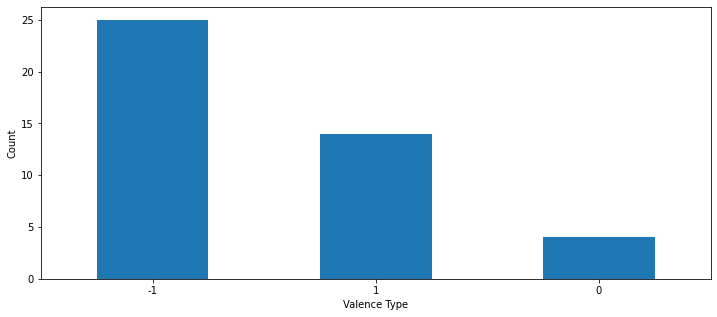

In [11]:
plt.figure(figsize= (12, 5))
weights['valence'].value_counts().plot.bar(rot= 0)
plt.xlabel("Valence Type")
plt.ylabel("Count")
plt.show()

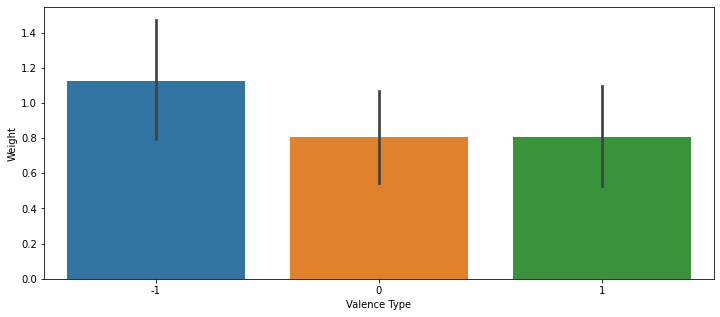

In [12]:
plt.figure(figsize= (12, 5))
sns.barplot(data = weights, x = 'valence', y = 'weight')
plt.xlabel("Valence Type")
plt.ylabel("Weight")
plt.show()

## 정서 점수

In [13]:
score = metric.score
score.head()

,emotion_score
2018-03-14 22:30,-0.736760
2018-03-17 04:24,34.455921
2018-03-18 04:47,-1.788958
2018-03-22 04:09,-10.594613
2018-04-05 14:43,-25.930290


In [14]:
color_dict = {1: 'pink', 0: 'lightblue'}

In [15]:
score['color'] = score["emotion_score"].map(lambda x: color_dict[int(x > 0)])

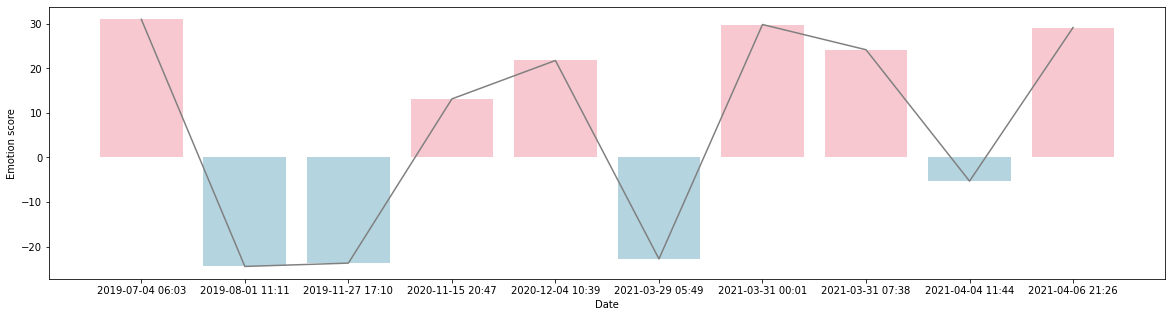

In [16]:
plt.figure(figsize= (20, 5))

sns.barplot(data = score.tail(10).reset_index(), x = "index", y = "emotion_score", palette = score['color'].tail(10))
sns.lineplot(data = score.tail(10).reset_index(), x = "index", y = "emotion_score", color = 'grey')
plt.xlabel("Date")
plt.ylabel("Emotion score")
plt.show()

## 긍/부정 점수

In [17]:
valence = metric.valence
valence.head()

valence,negative,positive
2018-03-14 22:30,32.986248,32.028247
2018-03-17 04:24,12.800026,69.546610
2018-03-18 04:47,24.965196,23.240439
2018-03-22 04:09,34.798803,22.630070
2018-04-05 14:43,41.057055,13.014982


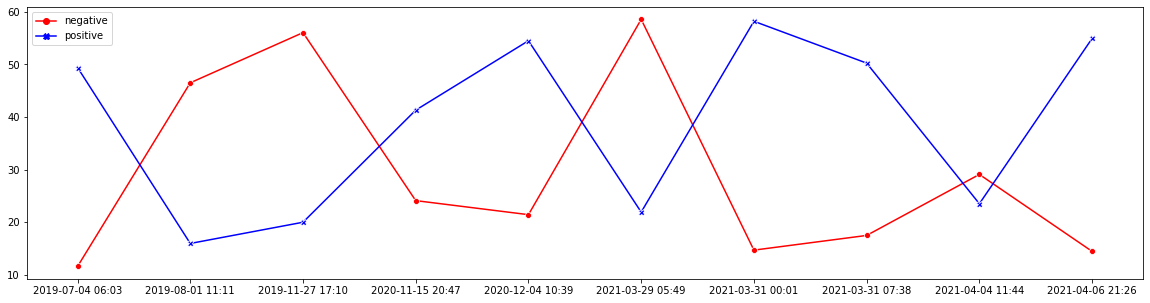

In [18]:
plt.figure(figsize= (20, 5))
sns.lineplot(data = valence.tail(10),  palette=['red', 'blue'], markers=True, dashes=False)
plt.show()

## 일자별 정서 강도

In [19]:
intensity = metric.intensity
intensity.head()

,intensity
2018-03-14 22:30,33.987009
2018-03-17 04:24,32.958194
2018-03-18 04:47,26.310164
2018-03-22 04:09,32.665377
2018-04-05 14:43,30.630797


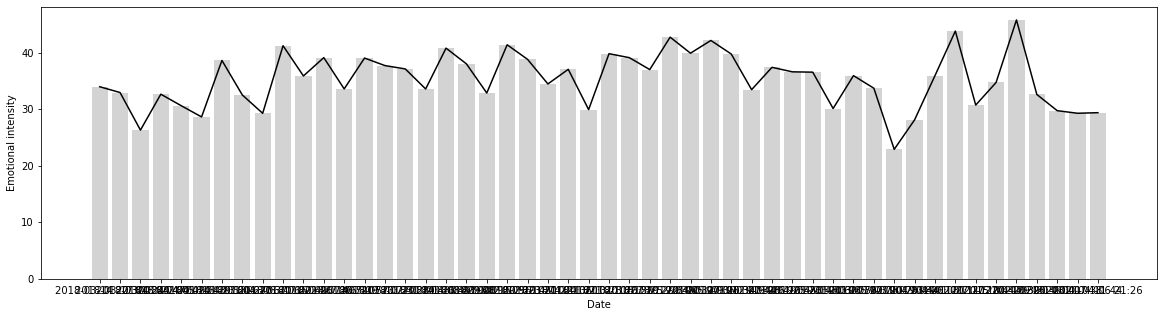

In [20]:
plt.figure(figsize= (20, 5))

sns.barplot(data = intensity.reset_index(), x = "index", y = "intensity", color = 'lightgrey')
sns.lineplot(data = intensity.reset_index(), x = "index", y = "intensity", color = 'black')
plt.xlabel("Date")
plt.ylabel("Emotional intensity")
plt.show()

## 일자별 상대 정서 강도
평균 정서 강도(= 1) 대비 정서 강도 비율

In [21]:
rel_intensity = metric.rel_intensity
rel_intensity.head()

,rel_intensity
2018-03-14 22:30,0.963298
2018-03-17 04:24,0.934138
2018-03-18 04:47,0.745712
2018-03-22 04:09,0.925839
2018-04-05 14:43,0.868173


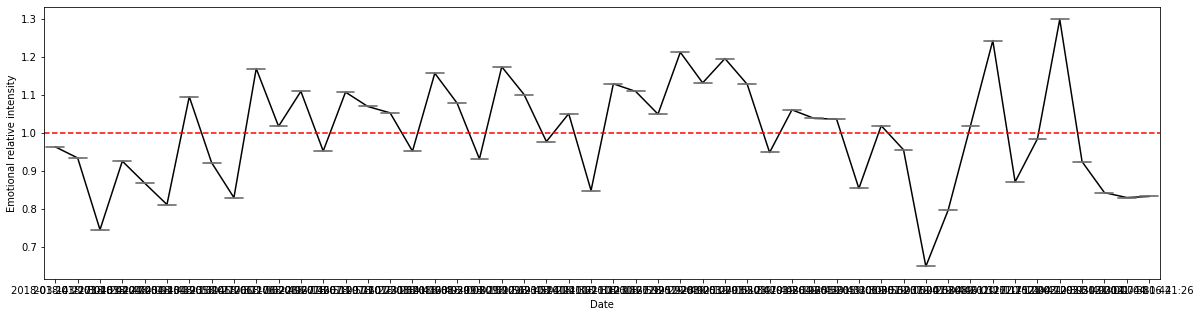

In [22]:
plt.figure(figsize= (20, 5))

sns.boxplot(data = rel_intensity.reset_index(), x = "index", y = "rel_intensity", color = 'lightgrey')
sns.lineplot(data = rel_intensity.reset_index(), x = "index", y = "rel_intensity", color = 'black')
plt.axhline(y = 1, c = 'red', linestyle = '--')
plt.xlabel("Date")
plt.ylabel("Emotional relative intensity")
plt.show()